## Introducción

El mundo medico esta en constante evolución y es impuslado por el insesante deseo de mejorar la calidad de la vida y prolongarla. El cancer es una enfermedad increiblemente desafiante y temida en el mundo por la dificultad para detectarla a tiempo y tratarla adecuadamentee. El uso e implementación de tecnicas de machine learning para detectar a tiempo estas enfermedades haciendo uso de las redes neuronales para clasificar imagenes de resonanciaa magneticas del cerebro

## Datos

Los datos fueron obtenidos de un dataset de kaggle. El data set consiste en 3264 imagenes JPG de resonancias magneticas cerebrales (MIR) de tumores
 con 4  clases diferentes ```glioma_tumor```, ```meningioma_tumor```, ```no_tumor``` y  ```pituitary_tumor```.

URL del dataset: https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri/data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Desarrollo del modelo

Lo primero que se hizo fue redimensionar las imagenes que estaban alojadas en una carpeta de drive para facilitar su acceso

Enlace carpeta: https://drive.google.com/drive/folders/1nmLoOazEL5nMdmmMmeIxf7u0a0AmMDO3?usp=sharing

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Dimensiones para redimensionar las imágenes
IMG_HEIGHT, IMG_WIDTH = 150, 150

# Directorios de entrenamiento y prueba
train_dir = '/content/drive/MyDrive/Brain Tumor Classification (MRI)/Training'
test_dir = '/content/drive/MyDrive/Brain Tumor Classification (MRI)/Testing'


##Modelo 1

Para este primer modelo se trataron de usar todos los approaches necesarios para mejorar el modelo como la implementación de técnicas de Data Augmentation, definicion de batch size y el uso de ImageGenerator para procesar las imagenes rápido

In [ ]:
batch_size = 32

#Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    validation_split=0.2,
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1.0/255)

#Train
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

#Validation
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

#Test
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    class_mode='categorical'
)


Found 2297 images belonging to 4 classes.
Found 573 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


La estructura de nuestro modelo consta de 4 capas convolucionales o CNN y una capa densa con funciones de activación relu, para agilizar nuestra red, usando el optimizador Adam, la función de perdida categorical_crossentropy y el accuracy como metrica de evaluación

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


Se definieron 25 epocas para agilizar este primer approach y se empezo a entrenar nuestra red

In [ ]:
epochs = 25
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
)


Epoch 1/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 60s 689ms/step - accuracy: 0.3372 - loss: 5.7140 - val_accuracy: 0.3199 - val_loss: 2.1956
Epoch 2/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.5000 - loss: 1.5362 - val_accuracy: 0.3103 - val_loss: 1.9468
Epoch 3/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 53s 376ms/step - accuracy: 0.4552 - loss: 1.5116 - val_accuracy: 0.2868 - val_loss: 2.1247
Epoch 4/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3750 - loss: 1.4036 - val_accuracy: 0.3103 - val_loss: 2.0083
Epoch 5/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 28s 371ms/step - accuracy: 0.4960 - loss: 1.1703 - val_accuracy: 0.3125 - val_loss: 1.6471
Epoch 6/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5312 - loss: 1.2621 - val_accuracy: 0.3793 - val_loss: 1.5061
Epoch 7/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 29s 377ms/step - accuracy: 0.5205 - loss: 1.0868 - val_accuracy: 0.3529 - val_loss: 1.4488
Epoch 8/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4688 - loss: 1.1210 - val_accuracy: 0.241

El accuracy que se obtuvo no fue el esperado y se trataron de realizar varias mejoras para el siguiente modelo

In [ ]:
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 135ms/step - accuracy: 0.3035 - loss: 8.9659
Test Accuracy: 33.07%


## Modelo 2

Para este nuevo modelo se cambiaron los parametros de Data Augmentation teniendo cuidado de que los tumores reflegados en cada imagen no perdieran visibilidad por los parametros de data augmentation, se cambio el batch size, ademas se usaron escalas de grises para que el modelo fuera más facil de procesar y la arquitectura del modelo

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Dimensiones de imagen más pequeñas y en escala de grises
IMG_HEIGHT, IMG_WIDTH = 150, 150

# Generador de datos con rescale a escala de grises
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    validation_split=0.2,
    rotation_range=np.random.uniform(10,45),
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.01,
    zoom_range=0.1,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1.0/255)

batch_size = 16

# Configuramos el flujo de imágenes en escala de grises
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical'
)


Found 2297 images belonging to 4 classes.
Found 573 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


Este nuevo modelo tiene más capas CNN y muchos más parametros para entrenar, ademas el learning rate es más pequeño

In [ ]:
# Modelo CNN optimizado
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),

    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compilación del modelo
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 74, 74, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 36, 36, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 34, 34, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 14, 14, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      25,690,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │           2,052 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,119,620 (99.64 MB)

 Trainable params: 26,118,532 (99.63 MB)

 Non-trainable params: 1,088 (4.25 KB)

Para este nuevo intento se agregaron 100 epocas para dejar que el modelo trabaje y se entrene más

In [ ]:
# Entrenamiento del modelo con menos épocas
epochs = 100
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


143/143 ━━━━━━━━━━━━━━━━━━━━ 1913s 13s/step - accuracy: 0.5156 - loss: 2.0870 - val_accuracy: 0.2964 - val_loss: 2.9428
Epoch 2/100
  1/143 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.5000 - loss: 1.0498

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


143/143 ━━━━━━━━━━━━━━━━━━━━ 10s 71ms/step - accuracy: 0.5000 - loss: 1.0498 - val_accuracy: 0.1538 - val_loss: 3.5088
Epoch 3/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 20s 133ms/step - accuracy: 0.6574 - loss: 0.9752 - val_accuracy: 0.2911 - val_loss: 7.9896
Epoch 4/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.5625 - loss: 0.8237 - val_accuracy: 0.1538 - val_loss: 8.8586
Epoch 5/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 20s 135ms/step - accuracy: 0.6900 - loss: 0.8087 - val_accuracy: 0.2857 - val_loss: 11.2340
Epoch 6/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8750 - loss: 0.3942 - val_accuracy: 0.4615 - val_loss: 8.4498
Epoch 7/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 39s 134ms/step - accuracy: 0.7300 - loss: 0.7290 - val_accuracy: 0.3411 - val_loss: 4.5725
Epoch 8/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step - accuracy: 0.6250 - loss: 0.8851 - val_accuracy: 0.1538 - val_loss: 5.0509
Epoch 9/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 22s 151ms/step - accuracy: 0.7569 - loss: 0.6117 - v

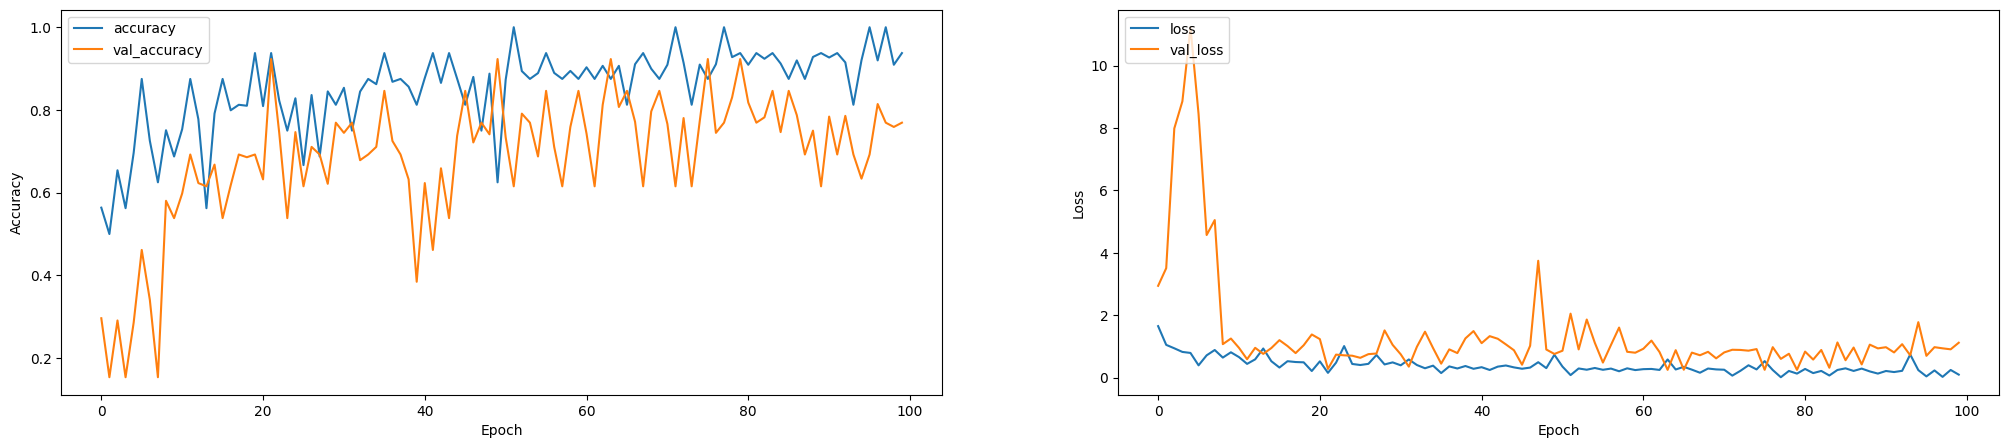

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2,figsize=(25, 5))
axs[0].plot(history.history['accuracy'], label='accuracy')
axs[0].plot(history.history['val_accuracy'], label = 'val_accuracy')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
#axs[0].set_ylim([0.89,0.92])
axs[0].legend(loc='upper left')

axs[1].plot(history.history['loss'], label='loss')
axs[1].plot(history.history['val_loss'], label = 'val_loss')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
#axs[1].set_ylim([0.31, 0.37])
axs[1].legend(loc='upper left')
plt.show()

Este nuevo modelo probo tener un mucho mejor accuracy pero sigue sin ser el más optimo o confiable

In [ ]:
# Evaluación del modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - accuracy: 0.6946 - loss: 7.6310
Test Accuracy: 67.97%


In [ ]:
# Guardar el modelo en formato Keras
model.save('modelo.keras')

# Guardar el modelo en formato HDF5
model.save('modelo.h5')


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted class: meningioma_tumor
Prediction confidence: 41.97%


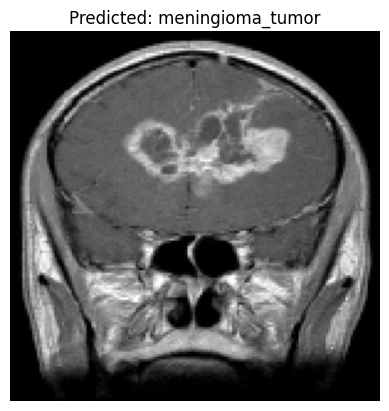

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predicted class: meningioma_tumor
Prediction confidence: 41.97%


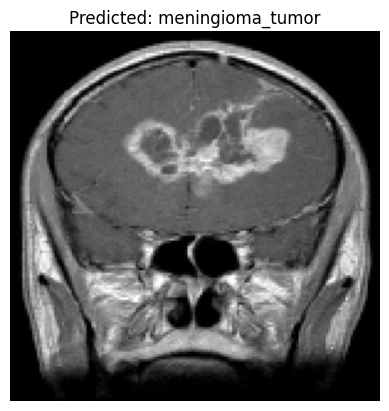

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

def predict_image(model, img_path, target_size=(150, 150)):
    # Cargar y preprocesar la imagen
    img = image.load_img(img_path, target_size=target_size, color_mode='grayscale')
    img_array = image.img_to_array(img)
    img_array = np.repeat(img_array, 3, axis=-1)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    # Realizar la predicción
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction[0])

    # Mostrar la imagen y la predicción
    class_names = list(train_generator.class_indices.keys())
    print(f"Predicted class: {class_names[predicted_class]}")
    print(f"Prediction confidence: {np.max(prediction) * 100:.2f}%")

    plt.imshow(img, cmap='gray')
    plt.title(f"Predicted: {class_names[predicted_class]}")
    plt.axis('off')
    plt.show()

# Ejemplo de uso
predict_image(model, '/content/drive/MyDrive/Brain Tumor Classification (MRI)/Testing/glioma_tumor/image(1).jpg')



predict_image(model, '/content/drive/MyDrive/Brain Tumor Classification (MRI)/Testing/glioma_tumor/image(1).jpg')


En la función de arriba se puede ver que a pesar de haber acertado en su clasificación el nivel de confianza de la imagen es muy bajo.

#### Pruebas de procesamiento de datos que fallaron:

In [ ]:
'''
# Configuración de parámetros
IMG_HEIGHT, IMG_WIDTH = 150, 150
BATCH_SIZE = 32

# Crear datasets desde directorios
train_dataset = image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE
)

validation_dataset = image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE
)

test_dataset = image_dataset_from_directory(
    test_dir,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE
)

# Preprocesamiento y optimización
AUTOTUNE = tf.data.AUTOTUNE

# Normalización de las imágenes
def preprocess_image(image, label):
    image = tf.image.per_image_standardization(image)  # Normaliza la imagen
    return image, label

train_dataset = train_dataset.map(preprocess_image, num_parallel_calls=AUTOTUNE)
validation_dataset = validation_dataset.map(preprocess_image, num_parallel_calls=AUTOTUNE)
test_dataset = test_dataset.map(preprocess_image, num_parallel_calls=AUTOTUNE)

# Prefetch para cargar datos en paralelo y optimizar
train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)
'''

In [ ]:
'''
def augment_image(image, label):
    image = tf.image.random_flip_left_right(image)  # Flip horizontal
    image = tf.image.random_brightness(image, max_delta=0.2)  # Cambiar brillo
    image = tf.image.random_contrast(image, lower=0.8, upper=1.2)  # Cambiar contraste

    # Rotación aleatoria basada en rot90
    k = tf.random.uniform([], minval=0, maxval=4, dtype=tf.int32)  # Rotaciones de 0, 90, 180 o 270 grados
    image = tf.image.rot90(image, k=k)

    return image, label

# Aplicar augmentación al dataset de entrenamiento
train_dataset = train_dataset.map(augment_image, num_parallel_calls=AUTOTUNE)
'''


Con este preprocesamiento y varías arquitecturas de CNN no se pudo conseguir un accuray mejor al 70% en el conjunto de test así que opte por mejor usar tsanfer learning y un nueva tecnica de procesamiento de imagenes. Tambien se observo que usar data augmentation no mejoraba el modelo significativamente, esto se puede deber a el conjunto de imagenes seleccionadas, ya que al ser resonancias magneticas alterar las imagenes altera las posiciones de los tumores y esto puede llegar a afectar el aprendizaje de nuestra red

#Modelo Final

Despues de probar con nuevas formas de procesamiento de datos sin usar ImageGenerator ni aumentación de datos se llego a la conclusión de que era mejor procesar las Imagenes sin necesidad de usar ImageDataGenerator y hacer uso de una función para el train/test split

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
import os
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from sklearn.metrics import classification_report,confusion_matrix
import ipywidgets as widgets
import io
from PIL import Image
from IPython.display import display,clear_output
from warnings import filterwarnings


In [4]:
labels = ['glioma_tumor','no_tumor','meningioma_tumor','pituitary_tumor']

In [5]:
dataset_path = '/content/drive/MyDrive/Brain Tumor Classification (MRI)'

X_train = []
y_train = []
image_size = 150
for i in labels:
    folderPath = os.path.join(dataset_path,'Training',i) # Update the path
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        X_train.append(img)
        y_train.append(i)

for i in labels:
    folderPath = os.path.join(dataset_path,'Testing',i) # Update the path
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        y_train.append(i)

X_train = np.array(X_train)
y_train = np.array(y_train)

100%|██████████| 74/74 [00:20<00:00,  3.67it/s]


In [6]:
X_train, y_train = shuffle(X_train,y_train, random_state=101)

In [7]:
X_train.shape

(3264, 150, 150, 3)

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train, test_size=0.1,random_state=101)

In [9]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)


y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)


In [10]:
effnet = EfficientNetB0(weights='imagenet',include_top=False,input_shape=(image_size,image_size,3))

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [11]:
model = effnet.output
model = tf.keras.layers.GlobalAveragePooling2D()(model)
model = tf.keras.layers.Dropout(rate=0.5)(model)
model = tf.keras.layers.Dense(4,activation='softmax')(model)
model = tf.keras.models.Model(inputs=effnet.input, outputs = model)

In [12]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 150, 150, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling (Rescaling)     │ (None, 150, 150, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization             │ (None, 150, 150, 3)    │              7 │ rescaling[0][0]        │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_1 (Rescaling)   │ (None, 150, 150, 3)    │              0 │ normalization[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv_pad             │ (None, 151, 151, 3)    │              0 │ rescaling_1[0][0]      │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv (Conv2D)        │ (None, 75, 75, 32)     │            864 │ stem_conv_pad[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn                   │ (None, 75, 75, 32)     │            128 │ stem_conv[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_activation           │ (None, 75, 75, 32)     │              0 │ stem_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_dwconv            │ (None, 75, 75, 32)     │            288 │ stem_activation[0][0]  │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_bn                │ (None, 75, 75, 32)     │            128 │ block1a_dwconv[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_activation        │ (None, 75, 75, 32)     │              0 │ block1a_bn[0][0]       │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_squeeze        │ (None, 32)             │              0 │ block1a_activation[0]… │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reshape        │ (None, 1, 1, 32)       │              0 │ block1a_se_squeeze[0]… │
│ (Reshape)                 │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reduce         │ (None, 1, 1, 8)        │            264 │ block1a_se_reshape[0]… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_expand    

 Total params: 4,054,695 (15.47 MB)

 Trainable params: 4,012,672 (15.31 MB)

 Non-trainable params: 42,023 (164.16 KB)

In [13]:
model.compile(loss='categorical_crossentropy',optimizer = 'Adam', metrics= ['accuracy'])

In [14]:
tensorboard = TensorBoard(log_dir = 'logs')
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 2, min_delta = 0.001,
                              mode='auto',verbose=1)

In [15]:
history = model.fit(X_train,y_train,validation_split=0.1, epochs =15, verbose=1, batch_size=32,
                   callbacks=[tensorboard,reduce_lr])

Epoch 1/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 142s 779ms/step - accuracy: 0.7140 - loss: 0.6891 - val_accuracy: 0.7449 - val_loss: 0.8236 - learning_rate: 0.0010
Epoch 2/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 40s 76ms/step - accuracy: 0.9374 - loss: 0.1633 - val_accuracy: 0.8435 - val_loss: 0.5285 - learning_rate: 0.0010
Epoch 3/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 6s 76ms/step - accuracy: 0.9590 - loss: 0.1082 - val_accuracy: 0.9082 - val_loss: 0.3137 - learning_rate: 0.0010
Epoch 4/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 10s 74ms/step - accuracy: 0.9815 - loss: 0.0612 - val_accuracy: 0.9252 - val_loss: 0.3606 - learning_rate: 0.0010
Epoch 5/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 6s 77ms/step - accuracy: 0.9784 - loss: 0.0602 - val_accuracy: 0.9116 - val_loss: 0.3662 - learning_rate: 0.0010
Epoch 6/15
82/83 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.9756 - loss: 0.0717
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
83/83 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - accuracy: 0.9756 - loss: 0.0717 - val

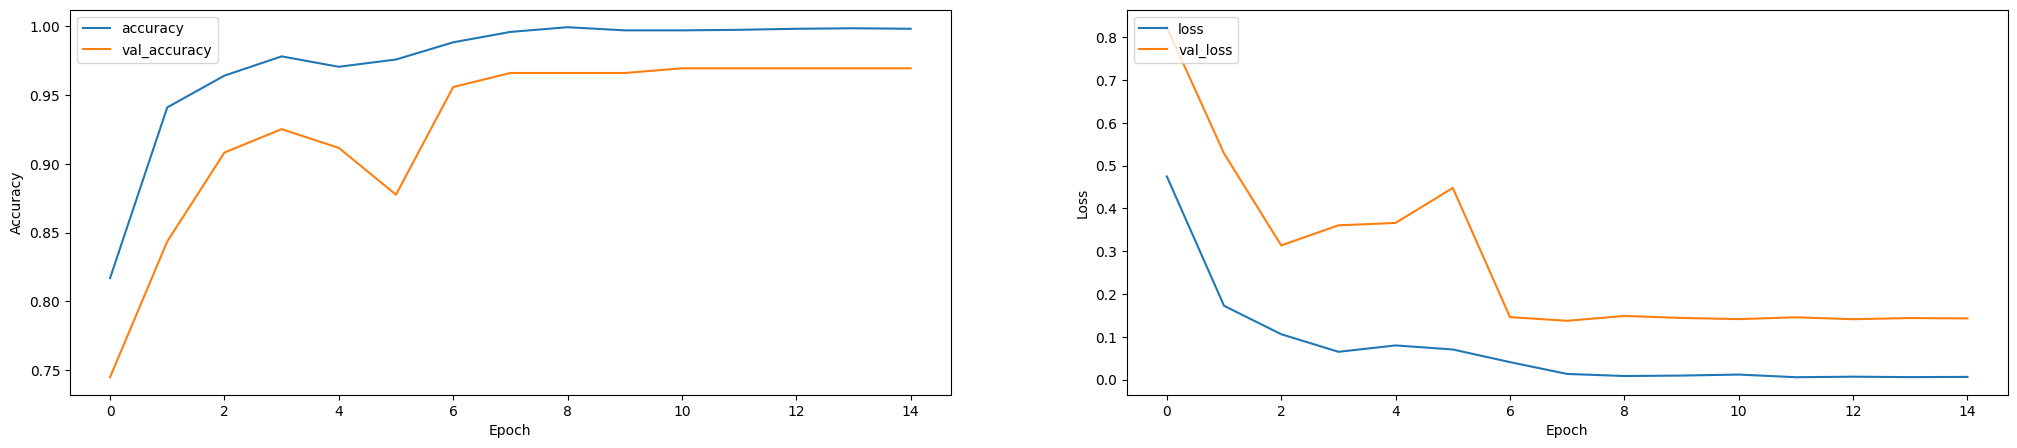

In [25]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2,figsize=(25, 5))
axs[0].plot(history.history['accuracy'], label='accuracy')
axs[0].plot(history.history['val_accuracy'], label = 'val_accuracy')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
#axs[0].set_ylim([0.89,0.92])
axs[0].legend(loc='upper left')

axs[1].plot(history.history['loss'], label='loss')
axs[1].plot(history.history['val_loss'], label = 'val_loss')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
#axs[1].set_ylim([0.31, 0.37])
axs[1].legend(loc='upper left')
plt.show()

In [16]:
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)

11/11 ━━━━━━━━━━━━━━━━━━━━ 14s 864ms/step


In [17]:
print(classification_report(y_test_new,pred))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97        93
           1       0.96      1.00      0.98        51
           2       0.96      0.97      0.96        96
           3       0.98      0.99      0.98        87

    accuracy                           0.97       327
   macro avg       0.97      0.98      0.97       327
weighted avg       0.97      0.97      0.97       327



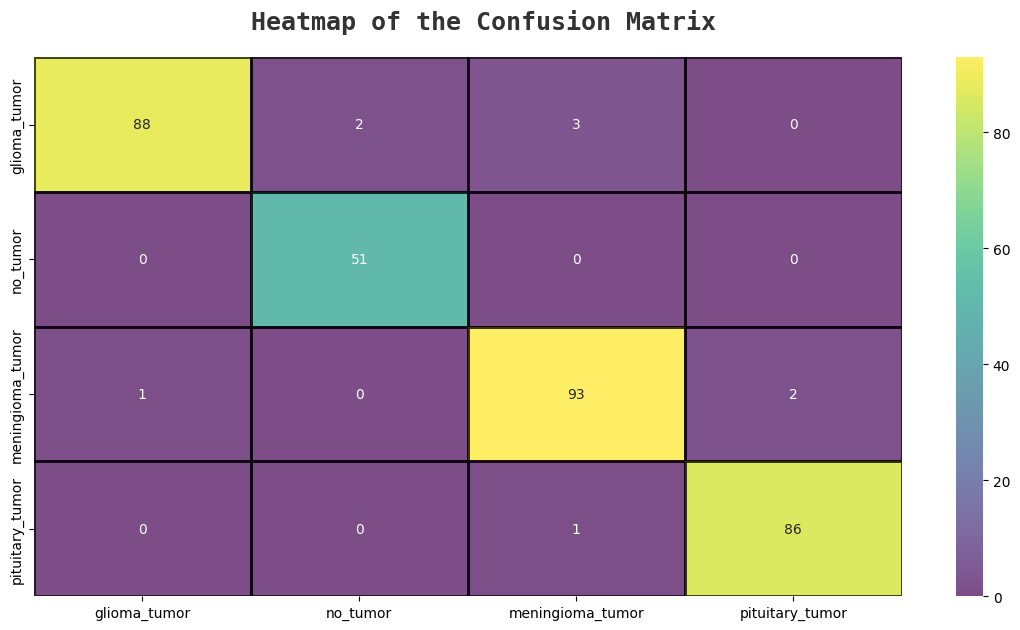

In [19]:
#Matriz de confusión
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming 'y_test_new' and 'pred' are already defined from your code
# and 'labels' contains the class names

fig, ax = plt.subplots(1, 1, figsize=(14, 7))
sns.heatmap(confusion_matrix(y_test_new, pred), ax=ax, xticklabels=labels, yticklabels=labels, annot=True,
            cmap='viridis', alpha=0.7, linewidths=2, linecolor='black')  # Use a suitable colormap
fig.text(s='Heatmap of the Confusion Matrix', size=18, fontweight='bold',
             fontname='monospace', color='black', y=0.92, x=0.28, alpha=0.8)

plt.show()

### Código para probar nuestro modelo con una imagen

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Predicted class: no_tumor
Prediction confidence: 99.95%


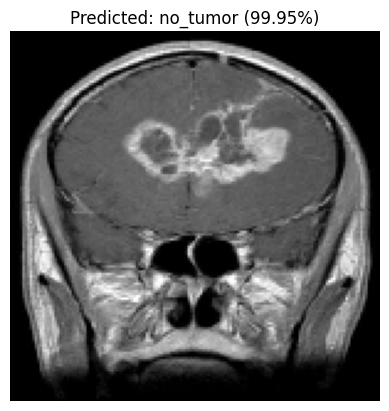

In [21]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

def predict_image(model, img_path, target_size=(150, 150)):
    # Cargar y preprocesar la imagen
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalizar la imagen

    # Realizar la predicción
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction[0])
    confidence = np.max(prediction[0])

    # Obtener los nombres de las clases (asumiendo que 'labels' está definido)
    class_names = labels # Reemplaza con tus nombres de clases si es diferente

    print(f"Predicted class: {class_names[predicted_class]}")
    print(f"Prediction confidence: {confidence * 100:.2f}%")

    plt.imshow(img)
    plt.title(f"Predicted: {class_names[predicted_class]} ({confidence * 100:.2f}%)")
    plt.axis('off')
    plt.show()

# Ejemplo de uso (asegúrate de que 'model' esté definido y cargado)
# Reemplaza '/content/ruta/a/tu/imagen.jpg' con la ruta real de tu imagen
predict_image(model, '/content/drive/MyDrive/Brain Tumor Classification (MRI)/Testing/glioma_tumor/image(1).jpg')

Aquí se puede ver que con transfer learning la precision de nuestro modelo aumenta muchisimo a la hora de clasificar imagens de nuestro conjunto de prueba

In [24]:
import keras

# Guardar el modelo en formato Keras
keras.saving.save_model(model, 'my_model.keras')

## Conclusiones

Con las nuevas mejoras implementadas, el uso de un pocesamiento diferente de imagenes, el uso de Transfer Learning y sin usar aumentación de datos el modelo mejoro demasiado sin necesidad de demasiadas epocas y en un mejor tiempo que con arquitecturas mucho más robustas. Esto resalta la importancia de conocer tus datos antes de procesarlos, el uso de transfer learning tambien ayudo demasiado, pero en las pruebas realizadas previamente solo se uso transfer learning sin hacer uso de un procesamiento de datos iferentes y eso no mejoro el modelo, es por eso que al final opte por cambiar la forma del proceamiento y en transfer learning hacer uso de tecnicas como earlystoping para veitar el overfittinng de nuestro modelo y mejorar su desempeño, gracias a estas nurevas estrategias no se tuvo de hacer uso de aumentación de datos ni de extender las epocas demasiado ademas de que el learning rate no se tuvo que disminuir lo cual ahorro mucha capacidad de computo, tiempo y recursos.